### Import libraries

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Load the data

In [71]:
train_data = pd.read_csv("./data/Train.csv")
test_data = pd.read_csv("./data/Test.csv")

### Basic Dataset Information

In [72]:
print("Train Dataset Shape:", train_data.shape)
print("\nData Types of Features:")
print(train_data.dtypes)
print("\nBasic Information about the Dataset:")
train_data.info()

Train Dataset Shape: (23524, 13)

Data Types of Features:
country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-n

### Check Missing Values

In [73]:
print("Missing Values Count:")
print(train_data.isnull().sum())
print("\nMissing Values Percentage:")
print((train_data.isnull().sum() / len(train_data)) * 100)

Missing Values Count:
country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Missing Values Percentage:
country                   0.0
year                      0.0
uniqueid                  0.0
bank_account              0.0
location_type             0.0
cellphone_access          0.0
household_size            0.0
age_of_respondent         0.0
gender_of_respondent      0.0
relationship_with_head    0.0
marital_status            0.0
education_level           0.0
job_type                  0.0
dtype: float64


### Examine Categorical Values

In [74]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
print("Unique values in categorical columns:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(train_data[col].value_counts())
    print(f"Number of unique values: {train_data[col].nunique()}")

Unique values in categorical columns:

country:
country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64
Number of unique values: 4

uniqueid:
uniqueid
uniqueid_17      4
uniqueid_16      4
uniqueid_18      4
uniqueid_2       4
uniqueid_3       4
                ..
uniqueid_7303    1
uniqueid_7302    1
uniqueid_7301    1
uniqueid_7300    1
uniqueid_7308    1
Name: count, Length: 8735, dtype: int64
Number of unique values: 8735

bank_account:
bank_account
No     20212
Yes     3312
Name: count, dtype: int64
Number of unique values: 2

location_type:
location_type
Rural    14343
Urban     9181
Name: count, dtype: int64
Number of unique values: 2

cellphone_access:
cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64
Number of unique values: 2

gender_of_respondent:
gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64
Number of unique values: 2

relationship_with_head:
relationship_with_head
Head of Hous

### Numerical Variables Statistsics

Statistical Summary of Numerical Variables:
               year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.797483          38.805220
std        0.847371        2.227613          16.520569
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.000000       21.000000         100.000000


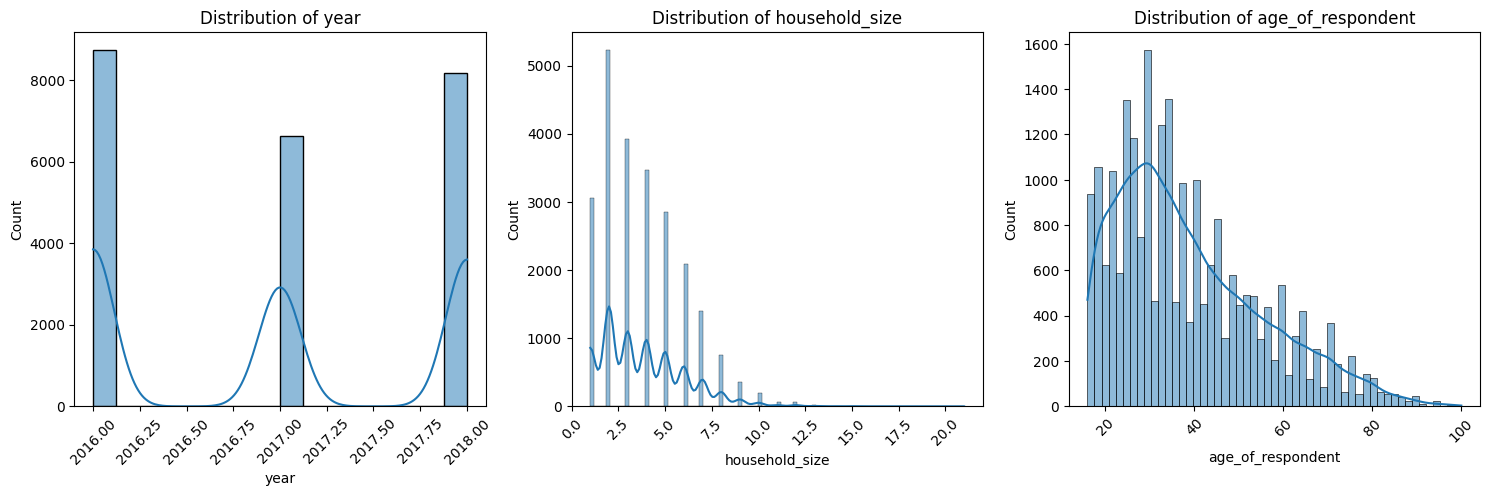

In [75]:
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
print("Statistical Summary of Numerical Variables:")
print(train_data[numerical_columns].describe())

# Visualize distributions of numerical variables
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Target Variable Distribution

Target Variable (bank_account) Distribution:
bank_account
No     20212
Yes     3312
Name: count, dtype: int64

Percentage Distribution:
bank_account
No     85.920762
Yes    14.079238
Name: proportion, dtype: float64


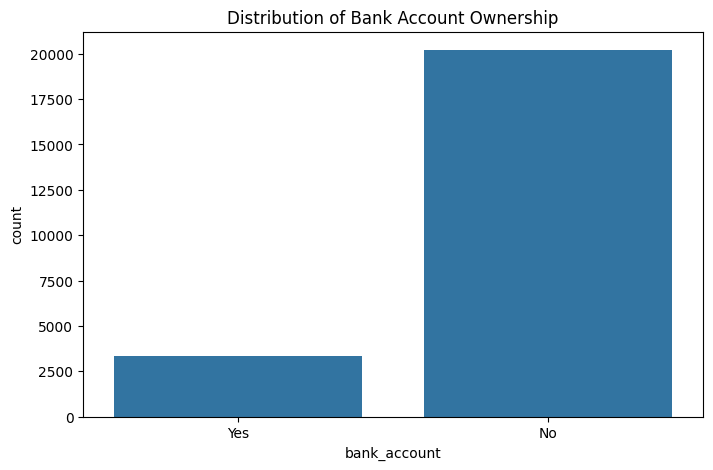

In [76]:
print("Target Variable (bank_account) Distribution:")
print(train_data['bank_account'].value_counts())
print("\nPercentage Distribution:")
print(train_data['bank_account'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='bank_account')
plt.title('Distribution of Bank Account Ownership')
plt.show()

### Convert categorical variables to numeric

In [77]:
# Create a copy of the dataframe to avoid warnings
df_cleaned = train_data.copy()

# Convert 'Yes'/'No' columns to 1/0
binary_columns = ['bank_account', 'cellphone_access']
for col in binary_columns:
    df_cleaned[col] = df_cleaned[col].map({'Yes': 1, 'No': 0})

# Create dummy variables for categorical columns
categorical_columns = ['country', 'location_type', 'gender_of_respondent', 
                      'relationship_with_head', 'marital_status', 
                      'education_level', 'job_type']

df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

### Scale numerical features

In [78]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['household_size', 'age_of_respondent']
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

### Feature engineering

In [79]:
# Create age groups
df_encoded['age_group'] = pd.cut(train_data['age_of_respondent'], 
                                bins=[0, 25, 35, 50, 65, 100],
                                labels=['Young', 'Young Adult', 'Adult', 'Senior', 'Elderly'])

# Create household size categories
df_encoded['household_size_category'] = pd.cut(train_data['household_size'],
                                             bins=[0, 2, 4, 6, float('inf')],
                                             labels=['Small', 'Medium', 'Large', 'Very Large'])

# Convert these new categorical features to dummy variables
df_encoded = pd.get_dummies(df_encoded, columns=['age_group', 'household_size_category'])

### Examine processes dataset

In [80]:
print("Processed Dataset Shape:", df_encoded.shape)
print("\nProcessed Features:")
print(df_encoded.columns.tolist())

# Check for any remaining missing values
print("\nMissing Values After Processing:")
print(df_encoded.isnull().sum().sum())

Processed Dataset Shape: (23524, 43)

Processed Features:
['year', 'uniqueid', 'bank_account', 'cellphone_access', 'household_size', 'age_of_respondent', 'country_Rwanda', 'country_Tanzania', 'country_Uganda', 'location_type_Urban', 'gender_of_respondent_Male', 'relationship_with_head_Head of Household', 'relationship_with_head_Other non-relatives', 'relationship_with_head_Other relative', 'relationship_with_head_Parent', 'relationship_with_head_Spouse', 'marital_status_Dont know', 'marital_status_Married/Living together', 'marital_status_Single/Never Married', 'marital_status_Widowed', 'education_level_Other/Dont know/RTA', 'education_level_Primary education', 'education_level_Secondary education', 'education_level_Tertiary education', 'education_level_Vocational/Specialised training', 'job_type_Farming and Fishing', 'job_type_Formally employed Government', 'job_type_Formally employed Private', 'job_type_Government Dependent', 'job_type_Informally employed', 'job_type_No Income', 'job

### Prepare features and target

In [81]:
# Remove non-feature columns before splitting
columns_to_drop = ['uniqueid', 'year']  # Add any other columns that shouldn't be used as features
X = df_encoded.drop(['bank_account'] + columns_to_drop, axis=1)
y = df_encoded['bank_account']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nFeatures included:", X.columns.tolist())

Training set shape: (18819, 40)
Testing set shape: (4705, 40)

Features included: ['cellphone_access', 'household_size', 'age_of_respondent', 'country_Rwanda', 'country_Tanzania', 'country_Uganda', 'location_type_Urban', 'gender_of_respondent_Male', 'relationship_with_head_Head of Household', 'relationship_with_head_Other non-relatives', 'relationship_with_head_Other relative', 'relationship_with_head_Parent', 'relationship_with_head_Spouse', 'marital_status_Dont know', 'marital_status_Married/Living together', 'marital_status_Single/Never Married', 'marital_status_Widowed', 'education_level_Other/Dont know/RTA', 'education_level_Primary education', 'education_level_Secondary education', 'education_level_Tertiary education', 'education_level_Vocational/Specialised training', 'job_type_Farming and Fishing', 'job_type_Formally employed Government', 'job_type_Formally employed Private', 'job_type_Government Dependent', 'job_type_Informally employed', 'job_type_No Income', 'job_type_Other 

### Import necessary libraries for modeling

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Results for {model_name}:")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy Score: {accuracy_score(y_true, y_pred):.4f}")
    print("-"*50)

In [83]:
# Verify all features are numeric
print("\nData types of features:")
print(X.dtypes)

# Check for any remaining non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['int64', 'float64']).columns
if len(non_numeric_cols) > 0:
    print("\nWarning: Non-numeric columns found:", non_numeric_cols.tolist())
else:
    print("\nAll features are numeric - good to proceed with modeling!")


Data types of features:
cellphone_access                                     int64
household_size                                     float64
age_of_respondent                                  float64
country_Rwanda                                        bool
country_Tanzania                                      bool
country_Uganda                                        bool
location_type_Urban                                   bool
gender_of_respondent_Male                             bool
relationship_with_head_Head of Household              bool
relationship_with_head_Other non-relatives            bool
relationship_with_head_Other relative                 bool
relationship_with_head_Parent                         bool
relationship_with_head_Spouse                         bool
marital_status_Dont know                              bool
marital_status_Married/Living together                bool
marital_status_Single/Never Married                   bool
marital_status_Widowed         

### Train and evaluate multiple models

In [84]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, name)
    results[name] = accuracy_score(y_test, y_pred)


Training Logistic Regression...
Results for Logistic Regression:

Confusion Matrix:
[[3952  111]
 [ 422  220]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      4063
           1       0.66      0.34      0.45       642

    accuracy                           0.89      4705
   macro avg       0.78      0.66      0.69      4705
weighted avg       0.87      0.89      0.87      4705

Accuracy Score: 0.8867
--------------------------------------------------

Training Decision Tree...
Results for Decision Tree:

Confusion Matrix:
[[3669  394]
 [ 375  267]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      4063
           1       0.40      0.42      0.41       642

    accuracy                           0.84      4705
   macro avg       0.66      0.66      0.66      4705
weighted avg       0.84      0.84      0.84      4705

Accuracy Sco

### Handle class imbalances

In [85]:
# Handle class imbalance
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Class weights:", class_weight_dict)

# Update models with class weights
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=42, scale_pos_weight=class_weights[1]/class_weights[0])
}

# Retrain and evaluate models
for name, model in models.items():
    print(f"\nTraining {name} with class weights...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, name)
    results[name] = accuracy_score(y_test, y_pred)

Class weights: {np.int64(0): np.float64(0.5826676574400892), np.int64(1): np.float64(3.5241573033707865)}

Training Logistic Regression with class weights...
Results for Logistic Regression:

Confusion Matrix:
[[3284  779]
 [ 163  479]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      4063
           1       0.38      0.75      0.50       642

    accuracy                           0.80      4705
   macro avg       0.67      0.78      0.69      4705
weighted avg       0.87      0.80      0.82      4705

Accuracy Score: 0.7998
--------------------------------------------------

Training Random Forest with class weights...
Results for Random Forest:

Confusion Matrix:
[[3764  299]
 [ 385  257]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      4063
           1       0.46      0.40      0.43       642

    accuracy                   

### Analyze feature importance of our best model

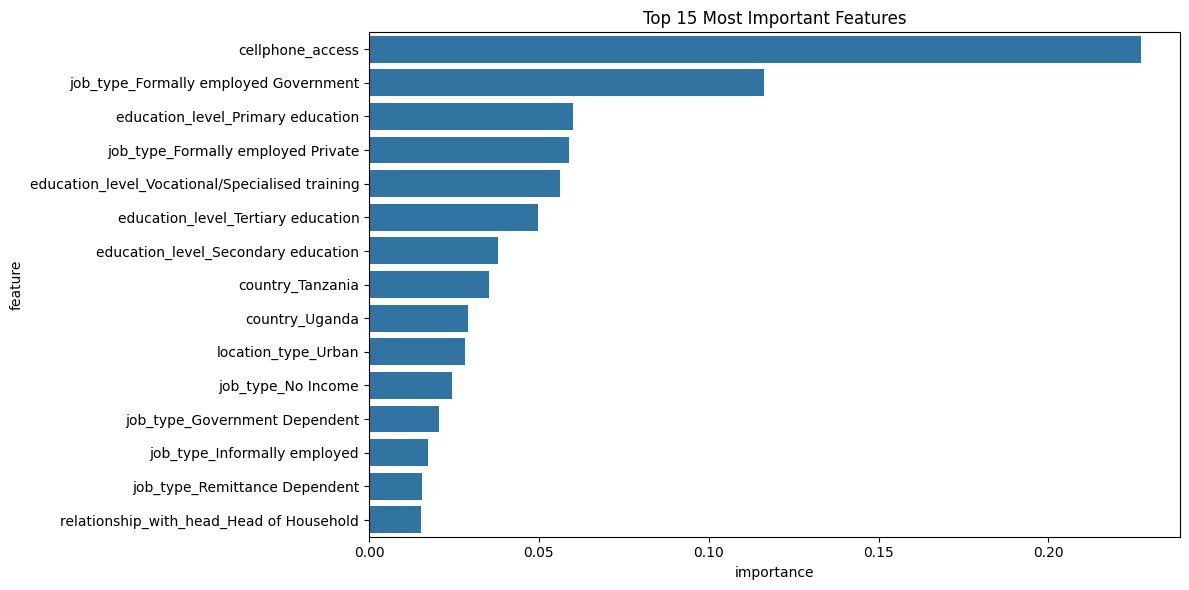

In [86]:
# Feature importance analysis
xgb_model = models['XGBoost']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()

### Cross-validation with stratification

In [88]:
# Modified Cross-validation approach
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize stratified k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to compute F1 score
from sklearn.metrics import f1_score

def cross_validate_model(model, X, y, cv):
    cv_scores = []
    
    for train_idx, val_idx in cv.split(X, y):
        # Split data
        X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        
        # Train model
        model.fit(X_train_cv, y_train_cv)
        
        # Predict and calculate F1 score
        y_pred_cv = model.predict(X_val_cv)
        cv_scores.append(f1_score(y_val_cv, y_pred_cv))
    
    return np.array(cv_scores)

# Perform cross-validation for each model
for name, model in models.items():
    cv_scores = cross_validate_model(model, X, y, skf)
    print(f"\n{name} CV F1-Scores: {cv_scores}")
    print(f"Mean F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Logistic Regression CV F1-Scores: [0.50578339 0.49244713 0.51200818 0.49358974 0.49800399]
Mean F1-Score: 0.5004 (+/- 0.0149)

Random Forest CV F1-Scores: [0.44117647 0.43197279 0.46730463 0.41572052 0.41758242]
Mean F1-Score: 0.4348 (+/- 0.0376)

XGBoost CV F1-Scores: [0.51290685 0.49540292 0.51222222 0.51914414 0.48622366]
Mean F1-Score: 0.5052 (+/- 0.0246)


### Feature importance analysis for XGBoost

In [92]:
# Load test data
test_data = pd.read_csv('data/Test.csv')
test_df = test_data.copy()

# Apply the same preprocessing steps to test data
# 1. Convert binary columns
binary_columns = ['cellphone_access']  # Note: 'bank_account' is not in test data
for col in binary_columns:
    test_df[col] = test_df[col].map({'Yes': 1, 'No': 0})

# 2. Create dummy variables for categorical columns
categorical_columns = ['country', 'location_type', 'gender_of_respondent', 
                      'relationship_with_head', 'marital_status', 
                      'education_level', 'job_type']

test_encoded = pd.get_dummies(test_df, columns=categorical_columns)

# 3. Scale numerical features
numerical_columns = ['household_size', 'age_of_respondent']
test_encoded[numerical_columns] = scaler.transform(test_encoded[numerical_columns])

# 4. Create age groups
test_encoded['age_group'] = pd.cut(test_data['age_of_respondent'], 
                                 bins=[0, 25, 35, 50, 65, 100],
                                 labels=['Young', 'Young Adult', 'Adult', 'Senior', 'Elderly'])

# 5. Create household size categories
test_encoded['household_size_category'] = pd.cut(test_data['household_size'],
                                               bins=[0, 2, 4, 6, float('inf')],
                                               labels=['Small', 'Medium', 'Large', 'Very Large'])

# 6. Convert the new categorical features to dummy variables
test_encoded = pd.get_dummies(test_encoded, columns=['age_group', 'household_size_category'])

# 7. Align test features with training features
test_features = test_encoded.reindex(columns=X.columns, fill_value=0)

# Now we can make predictions
best_model = models['XGBoost']
test_predictions = best_model.predict(test_features)

In [93]:
# Create submission dataframe with correct format
submission = pd.DataFrame({
    'unique_id': test_data['uniqueid'],  # Keep original uniqueid
    'bank_account': test_predictions     # Keep as 0/1 instead of converting to Yes/No
})

# Save predictions with correct format
submission.to_csv('predictions.csv', index=False)
print("\nSubmission file created with shape:", submission.shape)

# Display first few predictions to verify format
print("\nFirst few predictions:")
print(submission.head())

# Verify the format matches the sample submission
print("\nVerifying prediction values:")
print(submission['bank_account'].value_counts())


Submission file created with shape: (10086, 2)

First few predictions:
       unique_id  bank_account
0  uniqueid_6056             1
1  uniqueid_6060             1
2  uniqueid_6065             0
3  uniqueid_6072             0
4  uniqueid_6073             0

Verifying prediction values:
bank_account
0    7581
1    2505
Name: count, dtype: int64


In [94]:
# Load sample submission to verify format
sample_submission = pd.read_csv('data/SampleSubmission.csv')
print("\nSample submission format:")
print(sample_submission.head())

# Verify our submission has the same structure
print("\nOur submission format:")
print(submission.head())

# Verify column names match
print("\nColumn names match:", 
      set(submission.columns) == set(sample_submission.columns))


Sample submission format:
            unique_id  bank_account
0  uniqueid_1 x Kenya             0
1  uniqueid_2 x Kenya             0
2  uniqueid_3 x Kenya             0
3  uniqueid_4 x Kenya             0
4  uniqueid_5 x Kenya             0

Our submission format:
       unique_id  bank_account
0  uniqueid_6056             1
1  uniqueid_6060             1
2  uniqueid_6065             0
3  uniqueid_6072             0
4  uniqueid_6073             0

Column names match: True


Class weights: {np.int64(0): np.float64(0.5819315258262419), np.int64(1): np.float64(3.551328502415459)}

Logistic Regression CV F1-Scores: [0.50578339 0.49168766 0.51200818 0.49360341 0.499     ]
Mean F1-Score: 0.5004 (+/- 0.0152)

Random Forest CV F1-Scores: [0.43515358 0.44555278 0.46993671 0.41074523 0.41659751]
Mean F1-Score: 0.4356 (+/- 0.0425)

XGBoost CV F1-Scores: [0.49945235 0.48801743 0.5107084  0.51542857 0.49810913]
Mean F1-Score: 0.5023 (+/- 0.0194)

Submission file created with shape: (10086, 2)

First few predictions:
       unique_id  bank_account
0  uniqueid_6056             1
1  uniqueid_6060             1
2  uniqueid_6065             0
3  uniqueid_6072             0
4  uniqueid_6073             0


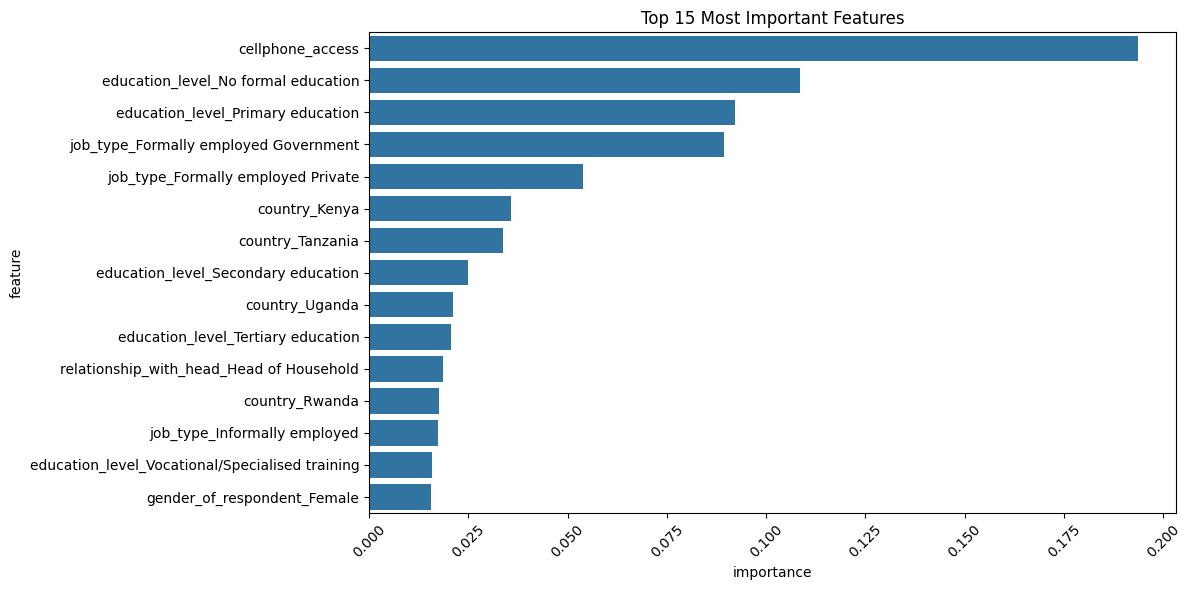

In [96]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

# 2. Load the data and sample submission
train_data = pd.read_csv('data/Train.csv')
test_data = pd.read_csv('data/Test.csv')
sample_submission = pd.read_csv('data/SampleSubmission.csv')

# Check for missing IDs
print("Sample submission shape:", sample_submission.shape)
print("Our test data shape:", test_data.shape)
missing_ids = set(sample_submission['unique_id']) - set(test_data['uniqueid'])
if missing_ids:
    print("\nMissing IDs in test data:", missing_ids)

# 3. Data preprocessing function to ensure consistent processing
def preprocess_data(df, is_training=True):
    # Create a copy to avoid warnings
    df_processed = df.copy()
    
    # Convert binary columns
    if is_training:
        df_processed['bank_account'] = df_processed['bank_account'].map({'Yes': 1, 'No': 0})
    df_processed['cellphone_access'] = df_processed['cellphone_access'].map({'Yes': 1, 'No': 0})
    
    # Create dummy variables for categorical columns
    categorical_columns = ['country', 'location_type', 'gender_of_respondent', 
                         'relationship_with_head', 'marital_status', 
                         'education_level', 'job_type']
    
    df_encoded = pd.get_dummies(df_processed, columns=categorical_columns)
    
    # Create age groups
    df_encoded['age_group'] = pd.cut(df_processed['age_of_respondent'], 
                                   bins=[0, 25, 35, 50, 65, 100],
                                   labels=['Young', 'Young Adult', 'Adult', 'Senior', 'Elderly'])
    
    # Create household size categories
    df_encoded['household_size_category'] = pd.cut(df_processed['household_size'],
                                                 bins=[0, 2, 4, 6, float('inf')],
                                                 labels=['Small', 'Medium', 'Large', 'Very Large'])
    
    # Convert new categorical features to dummy variables
    df_encoded = pd.get_dummies(df_encoded, columns=['age_group', 'household_size_category'])
    
    return df_encoded

# 4. Preprocess both train and test data
train_encoded = preprocess_data(train_data, is_training=True)
test_encoded = preprocess_data(test_data, is_training=False)

# 5. Prepare features and target
columns_to_drop = ['uniqueid', 'year']
X = train_encoded.drop(['bank_account'] + columns_to_drop, axis=1)
y = train_encoded['bank_account']

# Prepare test features
test_features = test_encoded.drop(columns_to_drop, axis=1)

# Ensure test features have same columns as training features
test_features = test_features.reindex(columns=X.columns, fill_value=0)

# 6. Scale numerical features
scaler = StandardScaler()
numerical_columns = ['household_size', 'age_of_respondent']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
test_features[numerical_columns] = scaler.transform(test_features[numerical_columns])

# 7. Train models with class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))

print("Class weights:", class_weight_dict)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=42, scale_pos_weight=class_weights[1]/class_weights[0])
}

# 8. Train and evaluate models using cross-validation
def cross_validate_model(model, X, y, cv):
    cv_scores = []
    for train_idx, val_idx in cv.split(X, y):
        X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_val_cv)
        cv_scores.append(f1_score(y_val_cv, y_pred_cv))
    return np.array(cv_scores)

# Perform cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    cv_scores = cross_validate_model(model, X, y, skf)
    print(f"\n{name} CV F1-Scores: {cv_scores}")
    print(f"Mean F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# 9. Train final model on full training data and make predictions
best_model = models['XGBoost']  # or whichever model performed best in CV
best_model.fit(X, y)

# Make predictions on test set
test_predictions = best_model.predict(test_features)

# 10. Create complete submission with handling for missing IDs
def create_complete_submission(predictions, test_data, sample_submission):
    submission = pd.DataFrame({
        'unique_id': test_data['uniqueid'],
        'bank_account': predictions
    })
    
    # Create a complete submission using the sample submission as template
    final_submission = sample_submission[['unique_id']].copy()
    final_submission = final_submission.merge(
        submission, 
        on='unique_id', 
        how='left'
    )
    
    # Fill any missing predictions with the most common prediction
    if final_submission['bank_account'].isnull().any():
        most_common = predictions.mode()[0]
        final_submission['bank_account'] = final_submission['bank_account'].fillna(most_common)
        print(f"\nFilled {final_submission['bank_account'].isnull().sum()} missing predictions with {most_common}")
    
    return final_submission

# Create and save the complete submission
final_submission = create_complete_submission(test_predictions, test_data, sample_submission)

# Verify the submission
print("\nFinal submission shape:", final_submission.shape)
print("Sample submission shape:", sample_submission.shape)
print("\nMissing values in final submission:", final_submission.isnull().sum())

# Save the complete submission
final_submission.to_csv('predictions.csv', index=False)
print("\nSaved complete submission file")
print("\nFirst few predictions:")
print(final_submission.head())

# 11. Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Verify specific IDs mentioned in the error
problem_ids = ['uniqueid_7867 x Kenya', 'uniqueid_6722 x Kenya', 
               'uniqueid_6714 x Kenya', 'uniqueid_8103 x Kenya', 
               'uniqueid_8657 x Kenya']

print("\nChecking problematic IDs:")
for id_check in problem_ids:
    present = id_check in final_submission['unique_id'].values
    print(f"{id_check}: {'Present' if present else 'Missing'}")